# Задание 2
## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Данные
Данные представляют собой значения 366 измерений температуры в течение года

In [2]:
url = "https://drive.google.com/uc?id=1kEgtvdhrvv4XMehTepUt3HiJnd6y_uJd"
data = pd.read_csv(url, names=['Temperature, C'], header=None)[1:]
data = round((data - 32) * (5/9)) # Фаренгейт -> Цельсий

In [3]:
data.head(5) # первые 5 значений показателя

,"Temperature, C"
1,0.0
2,4.0
3,7.0
4,10.0
5,3.0


In [4]:
data.shape # размерность данных

(366, 1)

## Функции для рассчета описательных статистик и удаления выбросов

In [5]:
def remove_outliers(data):
    q_75 = np.percentile(data, 75)
    q_25 = np.percentile(data, 25)
    IQR = q_75 - q_25
    upper_limit = q_75 + IQR*1.5
    lower_limit = q_25 - IQR*1.5
    data = data[(data.iloc[:,0] >= lower_limit) & (data.iloc[:,0] <= upper_limit)]
    if min(data.iloc[:,0]) < lower_limit or max(data.iloc[:,0]) > upper_limit:
        data = remove_outliers(data)
    return data

In [6]:
def location_and_spread(data):
    counts = {}
    for i in data.iloc[:,0]:
        counts[i] = counts.get(i, 0) + 1
    max_count = max(counts.values())
    sorted_data = sorted(data.iloc[:,0])
    length = len(data)

    Mean = round(sum(data.iloc[:,0])/len(data), 2)
    Mode = [round(k, 2) for k, v in counts.items() if v == max_count]
    if length % 2 == 0:
        Median = round((sorted_data[length//2] + sorted_data[length//2-1]) / 2, 2)
    else:
        Median = round(sorted_data[length//2], 2)
    
    D = round(sum([(t - Mean)**2 / (len(data)-1) for t in data.iloc[:,0]]), 2)
    std = round(D**(1/2), 2)
    
    print(f"Mean: {Mean}\nMode: {Mode}\nMedian: {Median}\nVariance: {D}\nStd: {std}")

## Графики на основе исходных данных и удаление выбросов

Построим линейные графики и ящики с усами для исходных данных и для данных с убранными выбросами. Так же построим гистограмму распределения и график ядерной оценки плотности поверх неё для выдвижения гипотезы о распределении данных.

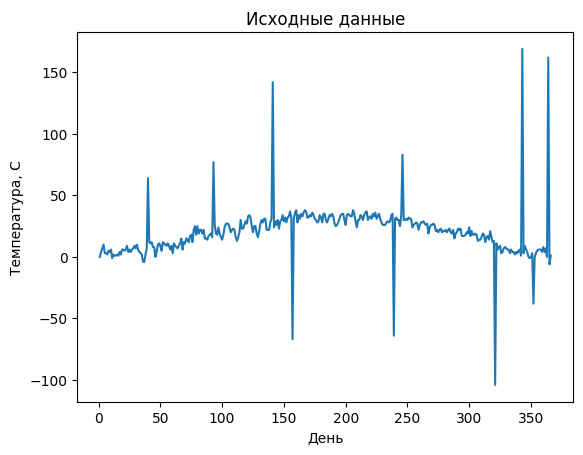

In [7]:
plt.plot(data)
plt.title("Исходные данные")
plt.ylabel("Tемпература, C")
plt.xlabel("День")
plt.show()

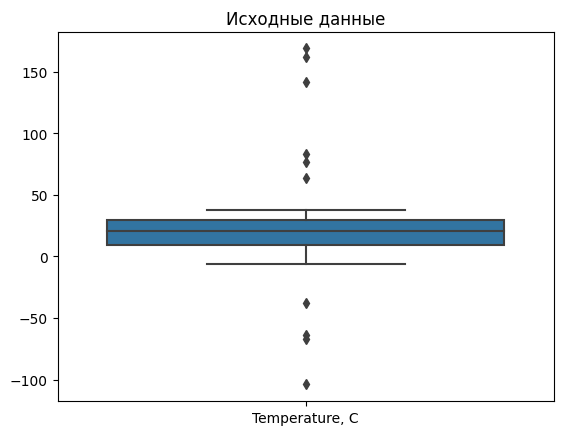

In [8]:
sns.boxplot(data)
plt.title("Исходные данные")
plt.show()

In [9]:
data = remove_outliers(data) # удаление выбросов

In [10]:
len(data)

356

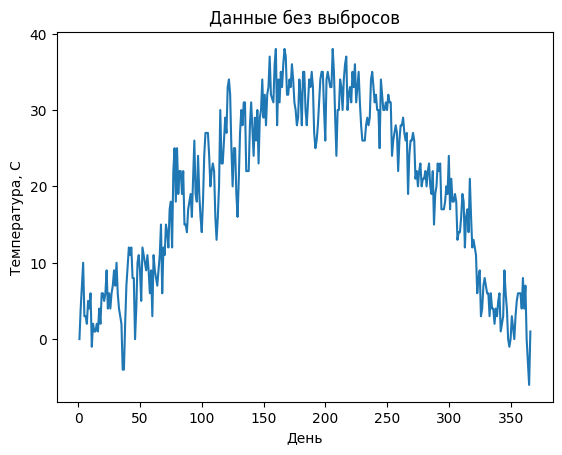

In [11]:
plt.plot(data)
plt.title("Данные без выбросов")
plt.ylabel("Tемпература, C")
plt.xlabel("День")
plt.show()

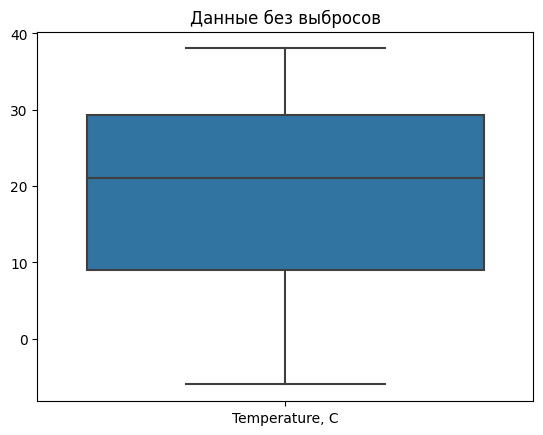

In [12]:
sns.boxplot(data)
plt.title("Данные без выбросов")
plt.show()

In [13]:
location_and_spread(data) # значения статистик 

Mean: 19.5
Mode: [6.0]
Median: 21.0
Variance: 124.71
Std: 11.17


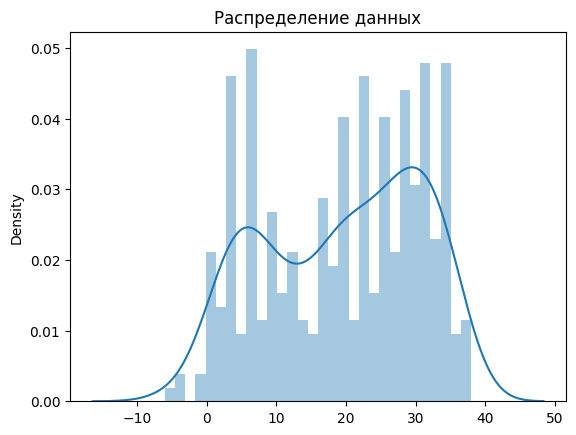

In [14]:
sns.distplot(data, bins=30)
plt.title("Распределение данных")
plt.show()

## Вывод:
По гистограмме и KDE видно, что распределение значений температуры не является унимодальным. Гипотеза: это распределение является смесью нормальных распределений.